In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [9]:
X, y = mnist.data, mnist.target

In [14]:
X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [15]:
X.shape, y.shape

((70000, 784), (70000,))

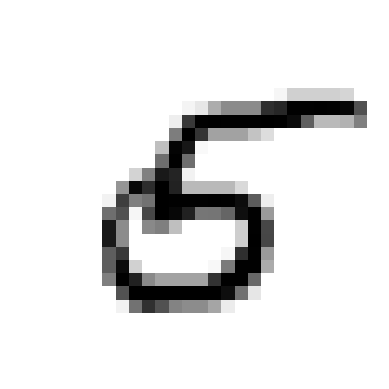

'5'

In [32]:
import random
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

i = random.randint(0, len(y) - 1)
some_digit = X[i]
plot_digit(some_digit)
plt.show()
y[i]

In [26]:
train_end = 60000
X_train, X_test, y_train, y_test = X[:train_end], X[train_end:], y[:train_end], y[train_end:]

In [28]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [34]:
sgd_clf.predict([some_digit])

array([ True])

In [54]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [38]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
any(dummy_clf.predict(X_train))

False

In [40]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_ids, test_ids in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_fold_i = X_train[train_ids]
    y_train_5_fold_i = y_train_5[train_ids]
    X_test_fold_i = X_train[test_ids]
    y_test_5_fold_i = y_train_5[test_ids]
    
    clone_clf.fit(X_train_fold_i, y_train_5_fold_i)
    
    n_test = len(y_test_5_fold_i)
    predicts_test_5_fold_i = clone_clf.predict(X_test_fold_i)
    n_matches = sum(predicts_test_5_fold_i == y_test_5_fold_i)
    print(n_matches / n_test)
    

0.95035
0.96035
0.9604


In [44]:
from sklearn.model_selection import cross_val_predict

pred_train_5 = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, pred_train_5)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

[f(y_train_5, pred_train_5) for f in [precision_score, recall_score, f1_score]]

[0.8370879772350012, 0.6511713705958311, 0.7325171197343846]

In [52]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3058.46623324])

In [55]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [56]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

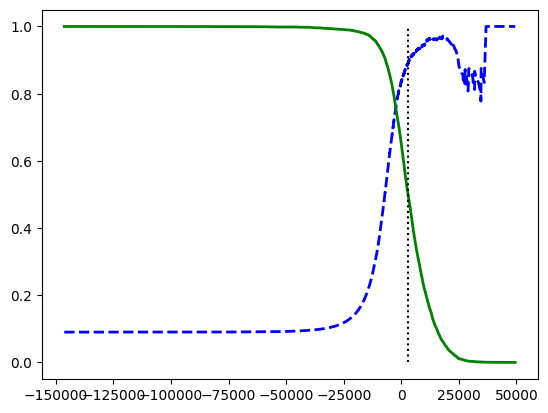

3058.8968495638155

In [81]:
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)

threshold = thresholds[57000]
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='threshold')
plt.show()

threshold

In [86]:
idx_for_90precision = (precisions >= 0.9).argmax()
threshold_for_90precision = thresholds[idx_for_90precision]
threshold_for_90precision

3370.0194991439557

In [89]:
yhat_train_5_90p = (y_scores >= threshold_for_90precision)
precision_score(y_train_5, yhat_train_5_90p)

0.9000345901072293

In [90]:
recall_at_90p = recall_score(y_train_5, yhat_train_5_90p)
recall_at_90p

0.4799852425751706